<h1 align=center><font size = 10> ASM 2 </font></h1>

# Bài toán

Trong notebook này, chúng ta sẽ thực hành tất cả các thuật toán phân loại mà chúng ta đã học trong khóa này.

Hãy tải tập dữ liệu bằng thư viện Pandas và áp dụng các thuật toán sau rồi tìm ra thuật toán tốt nhất cho tập dữ liệu cụ thể này bằng các phương pháp đánh giá độ chính xác.

Kiểu của tập dữ liệu và bài toán là một phân loại nhị phân có giám sát cổ điển. Với một số yếu tố có các đặc điểm (đặc trưng) nhất định, chúng ta cần xây dựng mô hình ML để xác định những người bị ảnh hưởng bởi bệnh tiểu đường loại 2.

Để giải quyết vấn đề, chúng ta sẽ phải phân tích dữ liệu, thực hiện bất kỳ chuyển đổi và chuẩn hóa cần thiết nào, áp dụng thuật toán học máy, huấn luyện mô hình, kiểm tra chất lượng của mô hình đã huấn luyện và lặp lại với các thuật toán khác cho đến khi tìm ra chất lượng cao nhất cho kiểu của tập dữ liệu.

# Pipeline 

1. Đọc dữ liệu.

3. Trực quan dữ liệu.

4. Tiền xử lý dữ liệu.

5. Xây dựng mô hình phân loại và đánh giá chất lượng.

  - KNN

  - Decision Tree

  - SVM

  - Logistic Regression

  - Neural Network

6. Xây dựng mô hình phân loại bằng Ensemble và đánh giá chất lượng.

  - Soft voting

  - Hard voting

7. Đưa ra kết quả tổng hợp chất lượng mô hình phân loại của tất cả thuật toán.

# Tập dữ liệu

Pima là một tộc người Mỹ bản địa sống ở Arizona. Yếu tố di truyền cho phép nhóm người này có thể tồn tại được với chế độ ăn nghèo carbohydrate trong nhiều năm. Những năm gần đây, do sự chuyển đổi đột ngột từ cây nông nghiệp truyền thống sang thực phẩm chế biến cùng với sự suy giảm hoạt động thể chất đã khiến tỷ lệ mắc bệnh tiểu đường loại 2 cao nhất, cho nên nó trở thành đối tượng của nhiều nghiên cứu.

Tập dữ liệu gồm dữ liệu từ 768 phụ nữ với 8 đặc điểm, cụ thể:

- Số lần mang thai
- Nồng độ đường huyết sau 2 giờ trong xét nghiệm dung nạp glucose đường uống
- Huyết áp tâm trương (mm Hg)
- Độ dày của nếp gấp da (mm)
- Insulin huyết thanh trong 2 giờ (mu U/ml)
- Chỉ số BMI (trọng lượng tính bằng kg/(chiều cao tính bằng m)^2)
- Chức năng phả hệ bệnh tiểu đường
- Tuổi (năm)
- Cột cuối cùng của tập dữ liệu cho biết một người có bị chẩn đoán mắc bệnh tiểu đường (1) hay không (0)

# Thư viện cần thiết

In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline

# Load dữ liệu từ file CSV  

### Task 1: Đọc dữ liệu 

Do file không chứa tên cột/đặc trưng, do đó hãy thêm tên cột bằng cách sử dụng mô tả từ trang web tập dữ liệu gốc:

Tên cột lần lượt là: "NumTimesPrg", "PlGlcConc", "BloodP", "SkinThick", "TwoHourSerIns", "BMI", "DiPedFunc", "Age", "HasDiabetes"

In [2]:
# Nhập code của bạn ở đây:
column_names = ["NumTimesPrg", "PlGlcConc", "BloodP", "SkinThick", "TwoHourSerIns", "BMI", "DiPedFunc", "Age", "HasDiabetes"]
df = pd.read_csv("pima-indians-diabetes.csv", names = column_names, header=None)

In [3]:
df.head()

,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Trực quan hóa và tiền xử lý dữ liệu



## Ma trận tương quan dữ liệu

Ma trận tương quan là một công cụ quan trọng để hiểu mối tương quan giữa các đặc điểm khác nhau. Các giá trị sẽ nằm trong khoảng từ -1 đến 1; giá trị càng gần 1 thì càng có giữa hai đặc điểm càng có mối tương quan tốt.

### Task 2: Tính ma trận tương quan cho tập dữ liệu.

In [4]:
# Nhập code của bạn ở đây:
df.corr()

,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
NumTimesPrg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
PlGlcConc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodP,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThick,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
TwoHourSerIns,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiPedFunc,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
HasDiabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


### Task 3: Trực quan ma trận tương quan bằng heatmap trong seaborn.

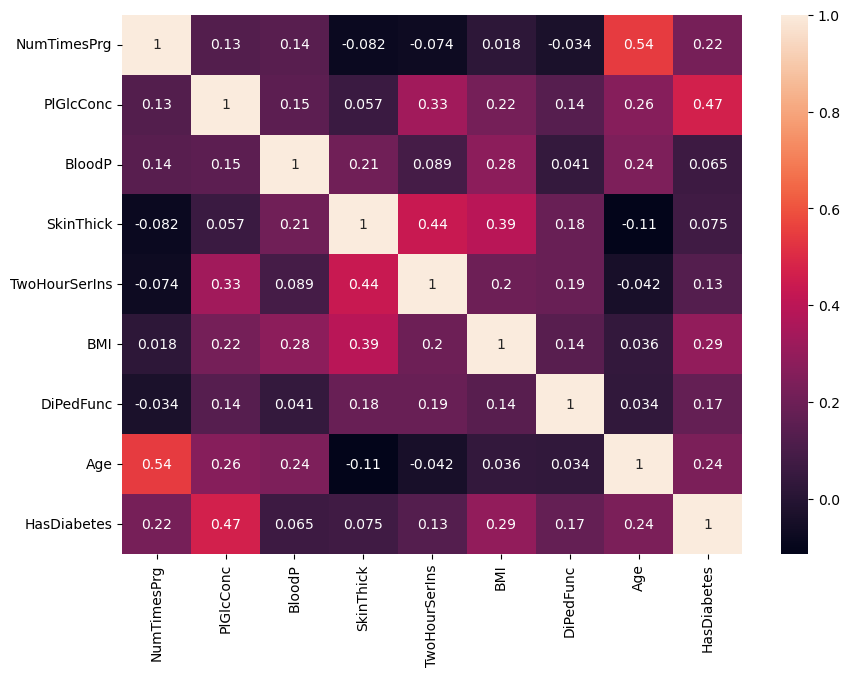

In [5]:
# Nhập code của bạn ở đây:
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(), annot=True)
plt.show()

## Trực quan hóa tập dữ liệu

Trực quan hóa dữ liệu là một bước quan trọng của phân tích dữ liệu. Nhờ có trực quan hóa dữ liệu, chúng ta sẽ hiểu rõ hơn về các phân phối giá trị đặc trưng khác nhau: ví dụ: chúng ta nắm được độ tuổi trung bình của mọi người hoặc chỉ số BMI trung bình,...

Tất nhiên, chúng ta có thể giới hạn việc xem xét hiển thị bảng, nhưng điều này cũng đồng nghĩa với việc chúng ta có thể sẽ bỏ lỡ những yếu tố quan trọng có thể ảnh hưởng đến độ chính xác của mô hình.

### Task 4: Trực quan histogram với tất cả cột tập dữ liệu.

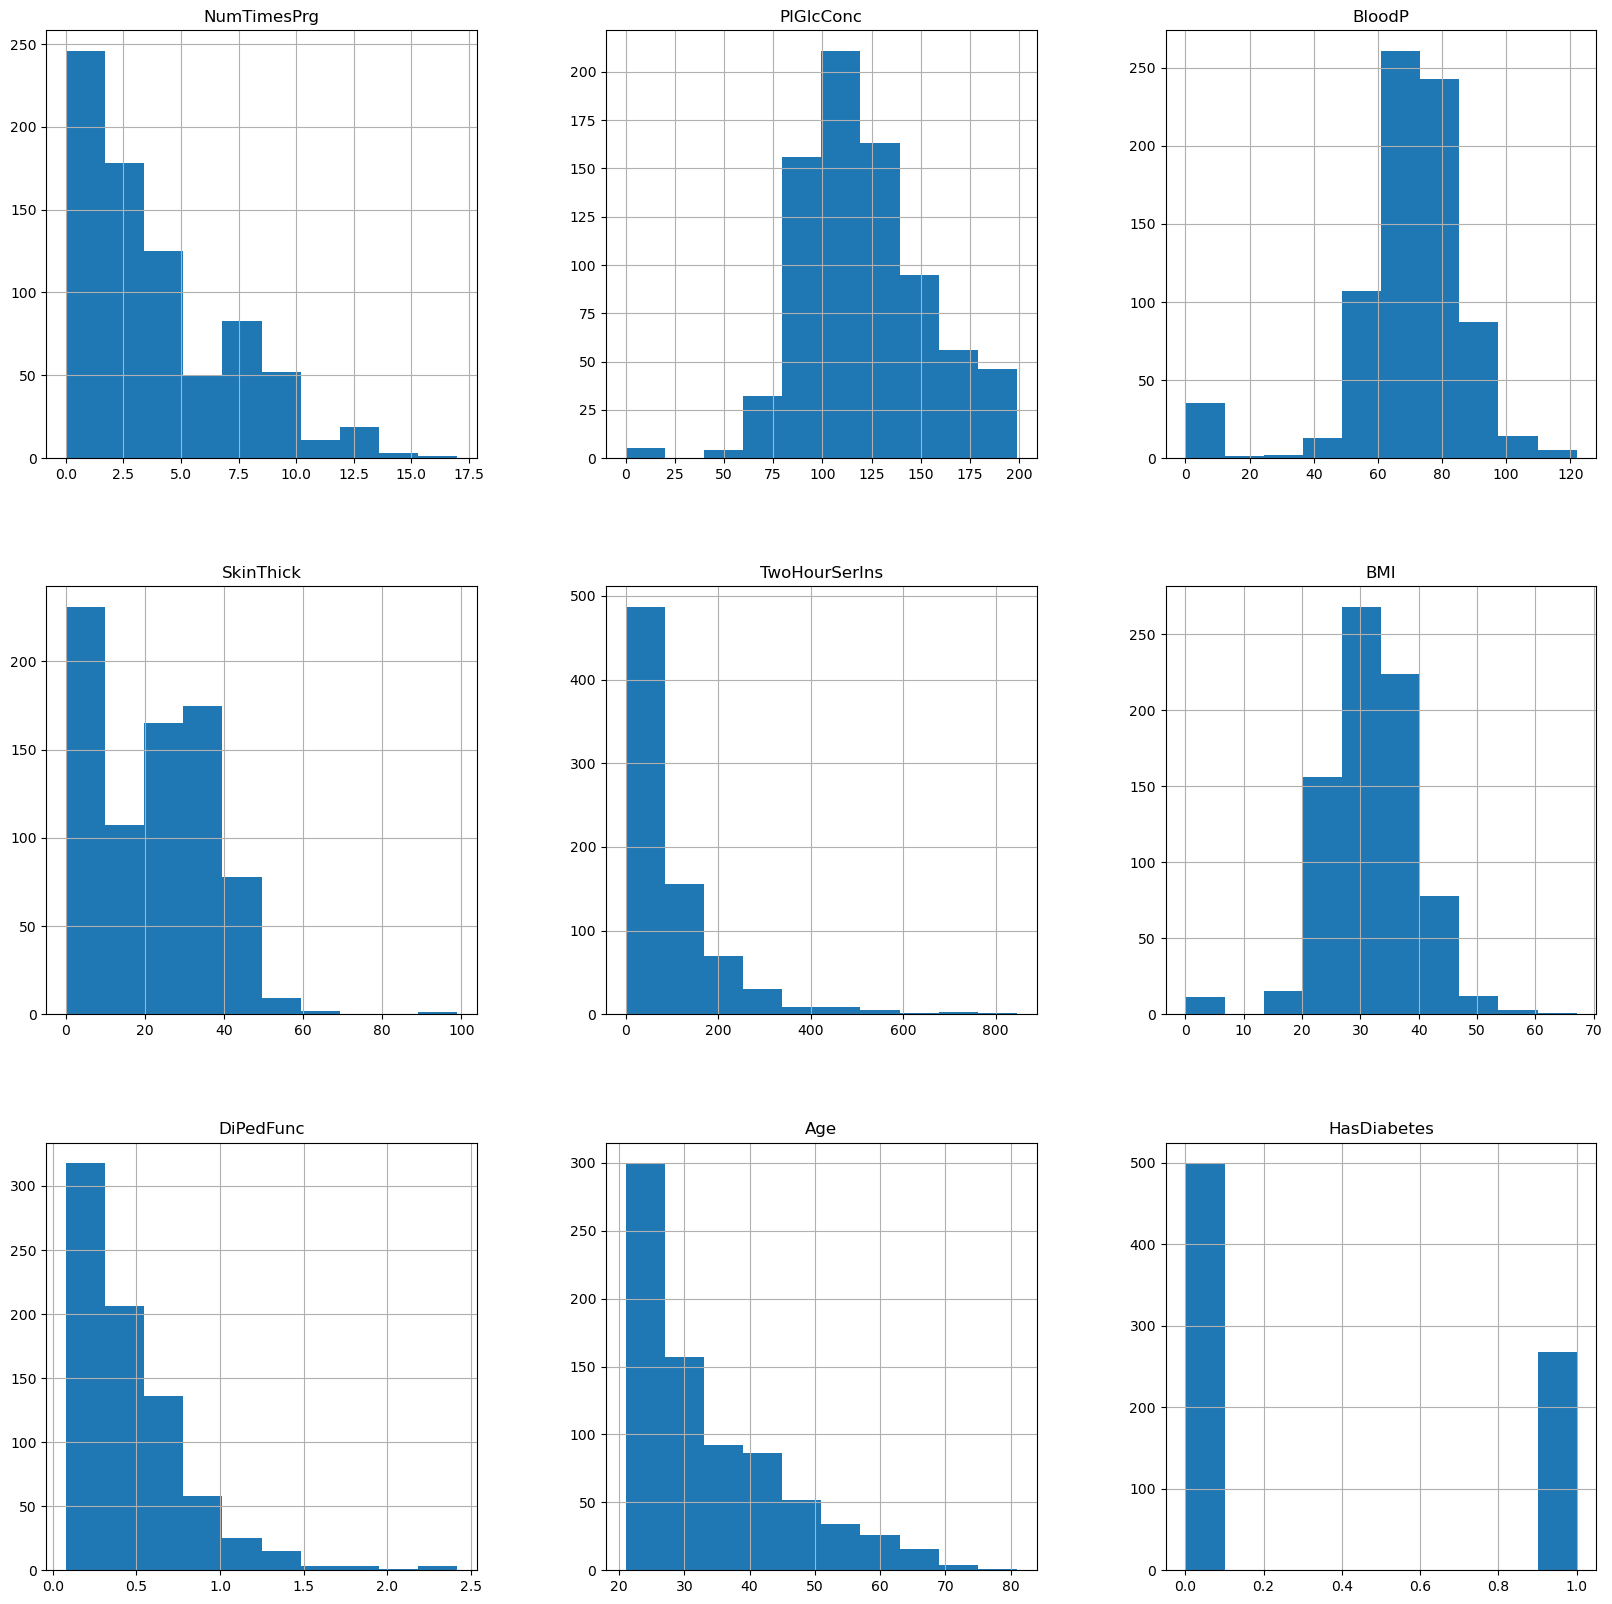

In [6]:
# Nhập code của bạn ở đây:
df.hist(figsize=(20, 20))
plt.show()

Tôi nhận thấy trong tập dữ liệu (điều này không rõ ràng ngay từ đầu) là thực tế một số người có giá trị null (không) cho một số đặc trưng: BMI hoặc huyết áp không hoàn toàn là 0.

Làm thế nào để xử lý các giá trị tương tự? Hãy xem phần sau trong giai đoạn biến đổi dữ liệu.

## Làm sạch và biến đổi dữ liệu

Từ phân tích trước, chúng ta đã nhận thấy một số bệnh nhân bị thiếu dữ liệu ở một số đặc trưng. Các thuật toán ML hoạt động không hiệu quả khi dữ liệu bị khuyết, vì vậy chúng ta phải tìm cách để "làm sạch" dữ liệu hiện có.
 
Cách dễ nhất là loại bỏ tất cả những bệnh nhân có giá trị null/0, nhưng nếu làm theo cách này, chúng ta cũng sẽ loại bỏ rất nhiều dữ liệu quan trọng.

Cách khác là thay thế giá trị null/0 bằng giá trị trung bình của cột dữ liệu đó. Hãy xem làm thế nào để áp dụng phương pháp thứ hai này.

### Task 5: Gán giá trị bị khuyết trên ['BMI', 'BloodP', 'PlGlcConc', 'SkinThick', 'TwoHourSerIns'] bằng giá trị trung vị hoặc bất kỳ cách nào khác có hiệu quả.

Chúng tôi chưa chuyển đổi tất cả các cột vì một số giá trị có thể là 0 (như "Số lần mang thai").

In [7]:
# Nhập code của bạn ở đây:
df1 = df.copy(deep=True)
df1[['BMI', 'BloodP', 'PlGlcConc', 'SkinThick', 'TwoHourSerIns']] = df1[['BMI', 'BloodP', 'PlGlcConc', 'SkinThick', 'TwoHourSerIns']].replace(0, np.nan)

In [8]:
colnames = ['BMI', 'BloodP', 'PlGlcConc', 'SkinThick', 'TwoHourSerIns']
# Thay the cac gia tri NaN bang gia tri Mean
for col in colnames:
    df1[col] = df1[col].fillna(df1[col].mean())

In [9]:
df1.isna().sum()

NumTimesPrg      0
PlGlcConc        0
BloodP           0
SkinThick        0
TwoHourSerIns    0
BMI              0
DiPedFunc        0
Age              0
HasDiabetes      0
dtype: int64

## Chuẩn hóa dữ liệu

Một trong những cách biến đổi dữ liệu quan trọng nhất mà chúng ta cần áp dụng là co giãn đặc trưng (feature scaling). Về cơ bản, hầu hết các thuật toán ML không hoạt động tốt nếu các đặc trưng có một bộ giá trị khác nhau. Ví dụ trong trường hợp của chúng ta, độ tuổi dao động từ 20 đến 80 tuổi, trong khi số lần bệnh nhân mang thai lại từ 0 đến 17 tuổi. Do đó, chúng ta cần áp dụng một phép biến đổi thích hợp.

### Task 6: Thực hiện co giãn dữ liệu thành giá trị trung bình bằng 0 và phương sai bằng 1.

Lưu ý: Chỉ áp dụng với các đặc trưng, không áp dụng với mục tiêu.

In [10]:
# Nhập code của bạn ở đây:
features = df1.columns[:-1]
X = df1[features].values
y = df1[df1.columns[-1]].values
# Chuan hoa du lieu
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

## Phân tách dữ liệu

Bây giờ dữ liệu đã được chuyển đổi, chúng ta cần chia tập dữ liệu thành hai phần: tập dữ liệu huấn luyện và tập dữ liệu kiểm tra. Phân tách tập dữ liệu là một bước rất quan trọng đối với các mô hình học máy có giám sát. Về cơ bản, chúng ta sẽ sử dụng phần đầu tiên để huấn luyện mô hình (bỏ qua cột có nhãn được gán trước), sau đó sử dụng mô hình đã huấn luyện để đưa ra dự đoán về dữ liệu mới (là tập dữ liệu kiểm tra, không phải là một phần của tập huấn luyện) và so sánh giá trị dự đoán với nhãn đã được chỉ định.

### Task 7: Tách tập dữ liệu train/test data

- test site = 20%
- random_state=7.

In [11]:
# Nhập code của bạn ở đây:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

**Câu hỏi: Tại sao chúng ta nên thực hiện chuẩn hóa và phân tách dữ liệu trước bước huấn luyện?**

Đáp án:
Chuẩn hóa dữ liệu là thay đổi giá trị của các cột số trong tập dữ liệu để sử dụng một thang đo chung, mà không làm sai lệch sự khác biệt trong phạm vi giá trị hoặc làm mất thông tin. Chuẩn hóa dữ liệu giúp mô hình hóa dữ liệu một cách chính xác hơn.

### Task 8: In ra tỷ lệ dương tính trên tổng số phụ nữ mắc bệnh tiểu đường trong tập dữ liệu đầy đủ, tập huấn luyện và tập kiểm tra.

In [12]:
# Nhập code của bạn ở đây:
# Tỉ lệ dương tính trên cả tập dữ liệu
positive_on_data = round(sum(df1["HasDiabetes"]) / len(df1["HasDiabetes"]) * 100, 2)
positive_on_data_train = round(sum(y_train) / len(y_train) * 100, 2)
positive_on_data_test = round(sum(y_test) / len(y_test) * 100, 2)
print(f"Tỉ lệ dương tính trên tập dữ liệu: {positive_on_data}%")
print(f"Tỉ lệ dương tính trên tập huấn luyện: {positive_on_data_train}%")
print(f"Tỉ lệ dương tính trên tập kiểm tra: {positive_on_data_test}%")

Tỉ lệ dương tính trên tập dữ liệu: 34.9%
Tỉ lệ dương tính trên tập huấn luyện: 34.36%
Tỉ lệ dương tính trên tập kiểm tra: 37.01%


# Phân loại 

Giờ đến lượt bạn rồi, hãy sử dụng tập huấn luyện để xây dựng một mô hình chính xác, sau đó sử dụng tập kiểm tra để báo lại độ chính xác của mô hình.

Bạn nên sử dụng các thuật toán sau:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression
- Neural Network
- Soft voting
- Hard voting



**__ Lưu ý:__**

- Bạn phải cố gắng **TINH CHỈNH ÍT NHẤT 3 SIÊU THAM SỐ** trên mỗi thuật toán, ngoại trừ soft voting và hard voting.
- Bạn có thể lên phía trên notebook và thay đổi quá trình tiền xử lý, lựa chọn đặc trưng, trích xuất đặc trưng,... để tạo ra mô hình tốt hơn.
- Bạn nên sử dụng thư viện scikit-learn, Scipy hoặc Numpy để phát triển các thuật toán phân loại.
- Bạn nên bao gồm code của thuật toán trong các cell sau.

## Import các phép đo đánh giá

In [13]:
from sklearn.metrics import jaccard_score, f1_score

In [14]:
# Dictionary để giữ tất cả score của bộ phân loại
f1_scores = {'train':{'KNN': 0, 'DT': 0, 'SVM': 0, 'LR': 0, 'NN': 0, 'EN_HARD': 0, 'EN_SOFT': 0},
             'test':{'KNN': 0, 'DT': 0, 'SVM': 0, 'LR': 0, 'NN': 0, 'EN_HARD': 0, 'EN_SOFT': 0}}
jaccard_scores = {'train':{'KNN': 0, 'DT': 0, 'SVM': 0, 'LR': 0, 'NN': 0, 'EN_HARD': 0, 'EN_SOFT': 0}, 
                  'test':{'KNN': 0, 'DT': 0, 'SVM': 0, 'LR': 0, 'NN': 0, 'EN_HARD': 0, 'EN_SOFT': 0}}


In [15]:
# Tạo function để lấy f1-score và jaccard score
def report_score(y, y_predict):
    """hàm nhận đầu vào là y và y predict
    output là f1 score và jaccard score"""
    f1_score = classification_report(y, y_predict, output_dict=True)['accuracy']
    jc_score = jaccard_score(y, y_predict)
    return f1_score, jc_score

## Task 9: K Nearest Neighbor(KNN)

Tinh chỉnh siêu tham số để có được mô hình KNN với độ chính xác tốt nhất. 

In ra các giá trị siêu tham số của mô hình KNN với độ chính xác tốt nhất. 

Đưa ra dự đoán từ dữ liệu huấn luyện và kiếm tra trên mô hình KNN. 

Tính f1 score và Jaccard score rồi lưu vào f1_scores dict và jaccard_scores dict.

Yêu cầu:

- Số lượng siêu tham số tối thiểu: 3

- Số lượng giá trị siêu tham số tối đa trong một lần tìm kiếm: 20

- Sử dụng GridSearchCV trong sklearn.model_selection.

- Không nên sử dụng dữ liệu kiểm tra để tìm ra các tham số tốt nhất.

- F1 score trên dữ liệu kiểm tra phải cao hơn **0.6**, Jaccard score phải cao hơn **0.4**.

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [17]:
# Tạo dictionary cho các tham số
# Các key là tham số
# Values là 1 list các giá trị của tham số
grid_params = {'n_neighbors' : np.arange(1, 51),
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [18]:
knn_gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=5)
knn_gs.fit(X_train, y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [19]:
# In ra tham số của mô hình có độ chính xác cao nhất.
knn_gs.best_params_

{'metric': 'minkowski', 'n_neighbors': 10, 'weights': 'uniform'}

In [20]:
# Sử dụng 3 hyperparameters cho models KNN 
knn_model = KNeighborsClassifier(n_neighbors=10, weights="uniform", metric="minkowski")
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [21]:
# Dự đoán trên tập huấn luyện và test
y_train_knn_predict = knn_model.predict(X_train)
y_test_knn_predict = knn_model.predict(X_test)

In [22]:
print(classification_report(y_train, y_train_knn_predict))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       403
           1       0.78      0.58      0.66       211

    accuracy                           0.80       614
   macro avg       0.79      0.75      0.76       614
weighted avg       0.80      0.80      0.79       614



In [23]:
print(jaccard_score(y_train, y_train_knn_predict).round(4))

0.4959


In [24]:
# F1 score và jaccard score trên tập huấn luyện
knn_f1_train, knn_jc_train = report_score(y_train, y_train_knn_predict)
print(knn_f1_train, knn_jc_train)

0.7980456026058632 0.4959349593495935


In [25]:
# F1 score và jaccard score trên tập test
knn_f1_test, knn_jc_test = report_score(y_test, y_test_knn_predict)
print(knn_f1_test, knn_jc_test)

0.7597402597402597 0.45588235294117646


In [26]:
f1_scores["train"]["KNN"] = knn_f1_train
f1_scores["test"]["KNN"] = knn_f1_test
jaccard_scores['train']['KNN'] = knn_jc_train
jaccard_scores['test']['KNN'] = knn_jc_test

**Câu hỏi: Diễn giải các tham số bạn đã chọn để tinh chỉnh trong thuật toán KNN.**

Trả lời:
- n_neighbors = 10 : 10 điểm gần nhất với 1 điểm đang xét đang xét
- weights :"uniform" : Trọng số cho các điểm lân cận. "uniform" tất cả 10 điểm có cùng 1 trọng số
- metric :"minkowski" : Tính toán khoảng cách của các điểm lân cận với 1 điểm đang xét, sử dụng phương pháp minkowski

## Task 10: Decision Tree

Tinh chỉnh siêu tham số để có được mô hình DT với độ chính xác tốt nhất. 

In ra các giá trị siêu tham số của mô hình DT với độ chính xác tốt nhất.

Đưa ra dự đoán từ dữ liệu huấn luyện và kiếm tra trên mô hình DT. 

Tính f1 score và Jaccard score rồi lưu vào f1_scores dict và jaccard_scores dict.

Yêu cầu:

- Số lượng siêu tham số tối thiểu: 3

- Số lượng giá trị siêu tham số tối đa trong một lần tìm kiếm: 20

- Sử dụng GridSearchCV trong sklearn.model_selection.

- Không nên sử dụng dữ liệu kiểm tra để tìm ra các tham số tốt nhất.

- F1 score trên dữ liệu kiểm tra phải cao hơn **0.6**, Jaccard score phải cao hơn **0.4**.

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
# Tạo dictionary cho các tham số
# Các key là tham số
# Values là 1 list các giá trị của tham số
tree_grid_params = {'criterion':["gini", "entropy", "log_loss"],
                   'splitter':['best', 'random'],
                   'max_depth':np.arange(1, 10)}

In [30]:
tree_gs = GridSearchCV(DecisionTreeClassifier(random_state=0), tree_grid_params, verbose = 1, cv=5)
tree_gs.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'splitter': ['best', 'random']},
             verbose=1)

In [31]:
# In ra tham so cua mo hinh cos do chinh xac cao nhat
tree_gs.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'splitter': 'best'}

In [32]:
# Tao mo hinh theo tham so tot nhat
tree_model = DecisionTreeClassifier(criterion="entropy", max_depth=5, splitter="best")
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [33]:
# du doan tren tap training va test
y_train_tree_predict = tree_model.predict(X_train)
y_test_tree_predict = tree_model.predict(X_test)

In [34]:
# f1 score and jaccard score in trainning 
tree_f1_training, tree_jc_training = report_score(y_train, y_train_tree_predict)
print(tree_f1_training, tree_jc_training)

0.8306188925081434 0.5648535564853556


In [35]:
# f1 score and jaccard score in test 
tree_f1_test, tree_jc_test = report_score(y_test, y_test_tree_predict)
print(tree_f1_test, tree_jc_test)

0.7857142857142857 0.5074626865671642


In [36]:
f1_scores["train"]["DT"] = tree_f1_training
f1_scores["test"]["DT"] = tree_f1_test
jaccard_scores['train']['DT'] = tree_jc_training
jaccard_scores['test']['DT'] = tree_jc_test

**Câu hỏi: Diễn giải các tham số bạn đã chọn để tinh chỉnh trong thuật toán DT.**

Đáp án:
- criterion="entropy" : Sử dụng "Entropy" để đo lường mức độ hiệu quả của việc phân tách
- splitter="best" : splitter là cách thức được sử dụng để phân chia tại các node, ở đây chúng ta chọn cách thức là "best"
- max_depth=5 : max_depth là độ sâu tối đa của mô hình tree, với bài toán này, giới hạn max_depth=5

## Task 11: Support Vector Machine

Tinh chỉnh siêu tham số để có được mô hình SVM với độ chính xác tốt nhất. 

In ra các giá trị siêu tham số của mô hình SVM với độ chính xác tốt nhất.

Đưa ra dự đoán từ dữ liệu huấn luyện và kiếm tra trên mô hình SVM. 

Tính f1 score và Jaccard score rồi lưu vào f1_scores dict và jaccard_scores dict.

Yêu cầu:

- Số lượng siêu tham số tối thiểu: 3

- Số lượng giá trị siêu tham số tối đa trong một lần tìm kiếm: 20

- Sử dụng GridSearchCV trong sklearn.model_selection.

- Không nên sử dụng dữ liệu kiểm tra để tìm ra các tham số tốt nhất.

- F1 score trên dữ liệu kiểm tra phải cao hơn **0.6**, Jaccard score phải cao hơn **0.4**.

In [37]:
from sklearn.svm import SVC

In [38]:
# Nhập code của bạn ở đây:
# Turning hypeeparameters cua mo hinh VSM
svm_params = {"kernel" :["linear", "poly", "rbf", "sigmoid"],
             "degree": np.arange(1, 6),
             "gamma": ["scale", "auto"]}

In [39]:
# tao mo hinh voi tham so dieu chinh
svc_gs = GridSearchCV(SVC(random_state=0), svm_params, cv=5, verbose=1)
svc_gs.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=SVC(random_state=0),
             param_grid={'degree': array([1, 2, 3, 4, 5]),
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=1)

In [40]:
# Tham so cua mo hinh co do chinh xac cao nhat
svc_gs.best_params_

{'degree': 1, 'gamma': 'scale', 'kernel': 'poly'}

In [41]:
# tao mo hinh voi tham so vua tim duoc
svc_model = SVC(kernel="poly", gamma="scale", degree=1, probability = True)
svc_model.fit(X_train, y_train)

SVC(degree=1, kernel='poly', probability=True)

In [42]:
# du doan tren tap training va test
y_train_svc_model = svc_model.predict(X_train)
y_test_svc_model = svc_model.predict(X_test)

In [43]:
#f1 score va jaccard score tren training
svc_f1_train, svc_jc_train = report_score(y_train, y_train_svc_model)
print(svc_f1_train, svc_jc_train)

0.7703583061889251 0.45136186770428016


In [44]:
#f1 score va jaccard score tren test
svc_f1_test, svc_jc_test = report_score(y_test, y_test_svc_model)
print(svc_f1_test, svc_jc_test)

0.7857142857142857 0.49230769230769234


In [45]:
f1_scores["train"]["SVM"] = svc_f1_train
f1_scores["test"]["SVM"] = svc_f1_test
jaccard_scores['train']['SVM'] = svc_jc_train
jaccard_scores['test']['SVM'] = svc_jc_test

**Câu hỏi: Diễn giải các tham số bạn đã chọn để tinh chỉnh trong thuật toán SVM.**

Đáp án:
- kernel="poly" : Sử dụng loại kernel là "poly" cho thuật toán
- degree=1 : Bậc của hàm đa thức 'poly'
- gamma="scale" : hệ số cho kernel
- probability = True : ước tính xác suất của model

## Task 12: Logistic Regression

Tinh chỉnh siêu tham số để có được mô hình LR với độ chính xác tốt nhất. 

In ra các giá trị siêu tham số của mô hình LR với độ chính xác tốt nhất.

Đưa ra dự đoán từ dữ liệu huấn luyện và kiếm tra trên mô hình LR. 

Tính f1 score và Jaccard score rồi lưu vào f1_scores dict và jaccard_scores dict.

Yêu cầu:

- Số lượng siêu tham số tối thiểu: 3

- Số lượng giá trị siêu tham số tối đa trong một lần tìm kiếm: 20

- Sử dụng GridSearchCV trong sklearn.model_selection.

- Không nên sử dụng dữ liệu kiểm tra để tìm ra các tham số tốt nhất.

- F1 score trên dữ liệu kiểm tra phải cao hơn **0.6**, Jaccard score phải cao hơn **0.4**.

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
lr_params = {"penalty": ["l1", "l2"],
            'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
             'solver': ['liblinear', 'saga']}

In [48]:
lr_gs = GridSearchCV(LogisticRegression(random_state=0), lr_params, verbose=1, cv=5)
lr_gs.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=0),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             verbose=1)

In [49]:
# In ra tham so cua mo hinh co do chinh xac cao nhat
lr_gs.best_params_

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

In [50]:
# Tao mo hinh voi tham so vua tim duoc
lr_model = LogisticRegression(C=0.1, penalty="l1", solver='liblinear')
lr_model.fit(X_train, y_train)

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [51]:
# Du doan ket qua tren tap training va test
y_train_lr_predict = lr_model.predict(X_train)
y_test_lr_predict = lr_model.predict(X_test)

In [52]:
# f1 score va jaccard score tren tap training
lr_f1_train, lr_jc_train = report_score(y_train, y_train_lr_predict)
print(lr_f1_train, lr_jc_train)

0.7703583061889251 0.45348837209302323


In [53]:
# f1 score va jaccard score tren tap test
lr_f1_test, lr_jc_test = report_score(y_test, y_test_lr_predict)
print(lr_f1_test, lr_jc_test)

0.7727272727272727 0.4852941176470588


In [54]:
f1_scores["train"]["LR"] = lr_f1_train
f1_scores["test"]["LR"] = lr_f1_test
jaccard_scores['train']['LR'] = lr_jc_train
jaccard_scores['test']['LR'] = lr_jc_test

**Câu hỏi: Diễn giải các tham số bạn đã chọn để tinh chỉnh trong thuật toán LR.**

Đáp án:
- penalty: là dạng hàm được sử dụng làm thành phần điều chuẩn .
- C: Hệ số nhân của thành phần điều chuẩn.
- solver: là phương pháp để giải bài toán tối ưu đối với cross entropy.

## Task 13: Neural Network

Tinh chỉnh siêu tham số để có được mô hình NN với độ chính xác tốt nhất. 

In ra các giá trị siêu tham số của mô hình NN với độ chính xác tốt nhất.

Đưa ra dự đoán từ dữ liệu huấn luyện và kiếm tra trên mô hình NN. 

Tính f1 score và Jaccard score rồi lưu vào f1_scores dict và jaccard_scores dict.

Yêu cầu:

- Số lượng siêu tham số tối thiểu: 3

- Số lượng giá trị siêu tham số tối đa trong một lần tìm kiếm: 20

- Sử dụng GridSearchCV trong sklearn.model_selection.

- Không nên sử dụng dữ liệu kiểm tra để tìm ra các tham số tốt nhất.

- F1 score trên dữ liệu kiểm tra phải cao hơn **0.6**, Jaccard score phải cao hơn **0.4**.

In [55]:
from sklearn.neural_network import MLPClassifier

In [56]:
# Nhập code của bạn ở đây:
nn_parameters = {
            'activation': ['logistic', 'tanh', 'relu'],
            "batch_size": [16, 32],
            "learning_rate_init": [0.001, 0.01, 0.1],
            "max_iter": [3000]
        }

In [57]:
nn_gs = GridSearchCV(MLPClassifier(random_state=0), nn_parameters, verbose=1, cv=3)
nn_gs.fit(X_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


GridSearchCV(cv=3, estimator=MLPClassifier(random_state=0),
             param_grid={'activation': ['logistic', 'tanh', 'relu'],
                         'batch_size': [16, 32],
                         'learning_rate_init': [0.001, 0.01, 0.1],
                         'max_iter': [3000]},
             verbose=1)

In [58]:
# Print các tham số tốt nhất
nn_gs.best_params_

{'activation': 'logistic',
 'batch_size': 16,
 'learning_rate_init': 0.001,
 'max_iter': 3000}

In [59]:
# Tạo model với tham số vừa tìm được
nn_model = MLPClassifier(activation='logistic',
                         batch_size=16,
                         learning_rate_init=0.001,
                         max_iter=3000)
nn_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', batch_size=16, max_iter=3000)

In [60]:
#  dự đoán trên tập training va test
y_train_nn_predict = nn_model.predict(X_train)
y_test_nn_predict = nn_model.predict(X_test)

In [61]:
# Tính f1 score và jaccard score trên tập training và test
nn_f1_train, nn_jc_train = report_score(y_train, y_train_nn_predict)
print(nn_f1_train, nn_jc_train)

0.7703583061889251 0.45977011494252873


In [62]:
# Tính f1 score và jaccard score trên tập training và test
nn_f1_test, nn_jc_test = report_score(y_test, y_test_nn_predict)
print(nn_f1_test, nn_jc_test)

0.7662337662337663 0.4857142857142857


In [63]:
# Lưu kết quả vào dictionary
f1_scores["train"]["NN"] = nn_f1_train
f1_scores["test"]["NN"] = nn_f1_test
jaccard_scores['train']['NN'] = nn_jc_train
jaccard_scores['test']['NN'] = nn_jc_test

**Câu hỏi: Diễn giải các tham số bạn đã chọn để tinh chỉnh trong thuật toán NN.**

Đáp án:
- activation='logistic' : Hàm kích hoạt tại các hidden layers. Với bài toán này output là binary output ta sẽ dụng hàm sigmoid để dự đoán kết quả ("logistic")
- batch_size=16 : kích thước của mini-batch để trainning
- learning_rate_init=0.001 : Hệ số learning rate để update trọng số
- max_iter=3000 : số lần lặp lại cho đến khi hội tụ

## Task 14: Soft Voting Ensemble 

Điều chỉnh trọng số trong Soft Voting Ensemble để đưa ra kết quả dự đoán tốt nhất.

Đưa ra dự đoán từ dữ liệu huấn luyện và kiếm tra trên mô hình soft voting ensembling model. 

Tính f1 score và Jaccard score rồi lưu vào f1_scores dict và jaccard_scores dict.

Yêu cầu:

- Sử dụng 5 mô hình trên

- Sử dụng cùng một thiết lập cho 5 mô hình như các bước trên.

- F1 score trên dữ liệu kiểm tra phải lớn hơn **0.66**, Jaccard similarity score phải lớn hơn **0.5**.

In [64]:
from sklearn.ensemble import VotingClassifier

In [65]:
# Nhập code của bạn ở đây:
soft_voting = VotingClassifier(estimators=[("knn", knn_model), ("tree", tree_model),
                                          ("svc", svc_model), ("lr", lr_model),
                                          ("nn", nn_model)], voting="soft")
soft_voting.fit(X_train, y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=10)),
                             ('tree',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=5)),
                             ('svc',
                              SVC(degree=1, kernel='poly', probability=True)),
                             ('lr',
                              LogisticRegression(C=0.1, penalty='l1',
                                                 solver='liblinear')),
                             ('nn',
                              MLPClassifier(activation='logistic',
                                            batch_size=16, max_iter=3000))],
                 voting='soft')

In [66]:
# Dự doán trên tập training và test
soft_voting_train_predict = soft_voting.predict(X_train)
soft_voting_test_predict = soft_voting.predict(X_test)

In [67]:
# Tính f1 score và jaccard score trên tập training và test
soft_voting_f1_train, soft_voting_jc_train = report_score(y_train, soft_voting_train_predict)
soft_voting_f1_test, soft_voting_jc_test = report_score(y_test, soft_voting_test_predict)

In [68]:
# Tổng hợp kết quả vào dictionary
f1_scores["train"]["EN_SOFT"] = soft_voting_f1_train
f1_scores["test"]["EN_SOFT"] = soft_voting_f1_test
jaccard_scores['train']['EN_SOFT'] = soft_voting_jc_train
jaccard_scores['test']['EN_SOFT'] = soft_voting_jc_test

## Task 15: Hard Voting Ensemble 

Điều chỉnh trọng số trong Hard Voting Ensemble để đưa ra kết quả dự đoán tốt nhất.

Đưa ra dự đoán từ dữ liệu huấn luyện và kiếm tra trên mô hình hard voting ensembling model. 

Tính f1 score và Jaccard score rồi lưu vào f1_scores dict và jaccard_scores dict.

Yêu cầu:

- Sử dụng 5 mô hình trên

- Sử dụng cùng một thiết lập cho 5 mô hình như các bước trên.

- F1 score trên dữ liệu kiểm tra phải lớn hơn **0.57**, Jaccard similarity score phải lớn hơn **0.45**.

In [69]:
# Nhập code của bạn ở đây:


In [70]:
hard_voting = VotingClassifier(estimators=[("knn", knn_model), ("tree", tree_model),
                                          ("svc", svc_model), ("lr", lr_model),
                                          ("nn", nn_model)], voting="hard")
hard_voting.fit(X_train, y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=10)),
                             ('tree',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=5)),
                             ('svc',
                              SVC(degree=1, kernel='poly', probability=True)),
                             ('lr',
                              LogisticRegression(C=0.1, penalty='l1',
                                                 solver='liblinear')),
                             ('nn',
                              MLPClassifier(activation='logistic',
                                            batch_size=16, max_iter=3000))])

In [71]:
# Dự doán trên tập training và test
hard_voting_train_predict = hard_voting.predict(X_train)
hard_voting_test_predict = hard_voting.predict(X_test)

In [72]:
# Tính f1 score và jaccard score trên tập training và test
hard_voting_f1_train, hard_voting_jc_train = report_score(y_train, hard_voting_train_predict)
hard_voting_f1_test, hard_voting_jc_test = report_score(y_test, hard_voting_test_predict)

In [73]:
# TỔng hợp f1 score và jaccard score vào ddictionary
f1_scores["train"]["EN_HARD"] = hard_voting_f1_train
f1_scores["test"]["EN_HARD"] = hard_voting_f1_test
jaccard_scores['train']['EN_HARD'] = hard_voting_jc_train
jaccard_scores['test']['EN_HARD'] = hard_voting_jc_test

# Báo cáo
Bạn có thể tường thuật độ chính xác của mô hình đã xây bằng cách sử dụng các phép đo đánh giá khác nhau:

| Algorithm | Jaccard-training | F1-score-training |Jaccard-testing | F1-score-testing |
|-----------|------------------|-------------------|----------------|------------------|
| KNN | ? | ? |  ? |  ? |
| Decision Tree | ? | ? |  ? |  ? |
| SVM | ? | ? |  ? |  ? |
| Logistic Regression| ? | ? |  ? |  ? |   
| Neural Network| ? | ? |  ? |  ? |
| Hard Voting | ? | ? |  ? |  ? |
| Soft Voting | ? | ? |  ? |  ? |


## Task 16: Tạo data frame mô tả kết quả chính xác như trên.

In [74]:
# Nhập code của bạn ở đây:
df_jaccard = pd.DataFrame.from_dict(jaccard_scores).rename(columns={"train":"Jaccard-training",
                                                                   "test":"Jaccard-testing"})
df_f1 = pd.DataFrame.from_dict(f1_scores).rename(columns={"train":"F1-score-training",
                                                                   "test":"F1-score-testing"})
df = pd.concat([df_jaccard, df_f1], axis=1)
df

,Jaccard-training,Jaccard-testing,F1-score-training,F1-score-testing
KNN,0.495935,0.455882,0.798046,0.759740
DT,0.564854,0.507463,0.830619,0.785714
SVM,0.451362,0.492308,0.770358,0.785714
LR,0.453488,0.485294,0.770358,0.772727
NN,0.459770,0.485714,0.770358,0.766234
EN_HARD,0.474708,0.492537,0.780130,0.779221
EN_SOFT,0.522088,0.515152,0.806189,0.792208


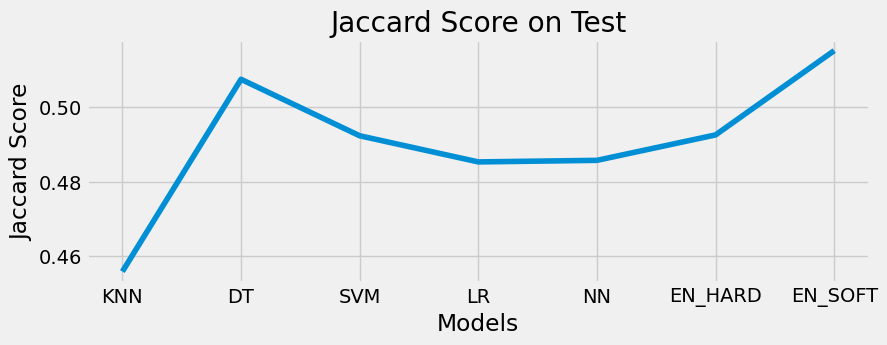

In [77]:
# Plot Jaccard score của các model trên tập Test
plt.style.use('fivethirtyeight')
plt.figure(figsize=(9,3))
plt.plot(df.index, df['Jaccard-testing'])
plt.xlabel("Models")
plt.ylabel("Jaccard Score")
plt.title("Jaccard Score on Test")
plt.show()

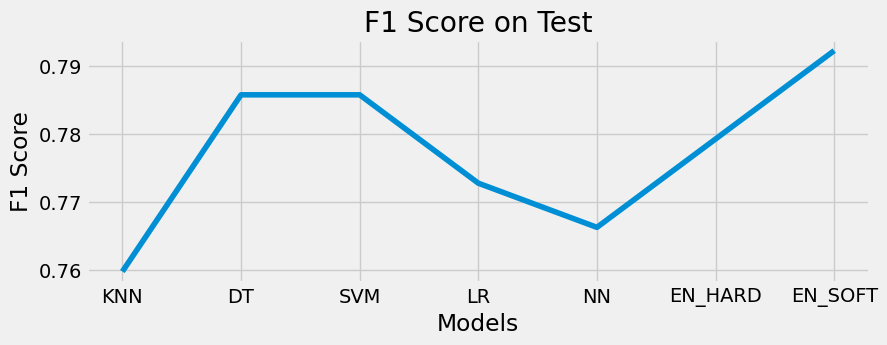

In [78]:
# Plot f1 score của các model trên tập Test
plt.figure(figsize=(9,3))
plt.plot(df.index, df['F1-score-testing'])
plt.xlabel("Models")
plt.ylabel("F1 Score")
plt.title("F1 Score on Test")
plt.show()

**Câu hỏi: Có phải các phương pháp ensemble luôn tốt hơn một mô hình đơn lẻ không? Nếu không, hãy giải thích tại sao?**

Trả lời:
- Qua biểu đồ so sánh điểm jaccard và F1 của các model trên. Ta có thể thấy phương pháp Ensemble có kết quả tốt hơn các model đơn lẻ:
- phương pháp ensemble có kết quả tốt hơn vì nó được kết hợp từ các có model đơn lẻ với nhau một cách hợp lý để tạo thành một mô hình kết hợp mạnh có khả năng cải thiện hiệu suât tổng thể